In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio as psnr

def get_sub_frame(filename):
    f = os.path.join(filename)
    arr = np.fromfile(f, dtype=np.single)

    snapshot = arr[50*500*500:51*500*500]
    snapshot = np.resize(snapshot,(500,500))

    # snapshot = snapshot[:100,:100]
    return snapshot

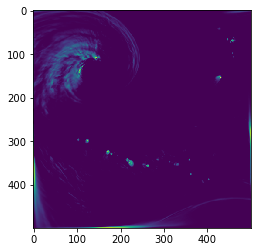

In [2]:
plt.imshow(get_sub_frame("QSNOWf48.bin.f32"), interpolation='nearest')
plt.show()

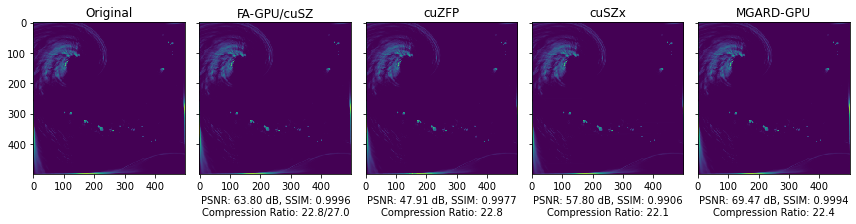

In [7]:
img = get_sub_frame("QSNOWf48.bin.f32")
img_cusz = get_sub_frame("QSNOWf48.bin.f32.cuszx")
img_cuzfp = get_sub_frame("QSNOWf48.bin.f32.dcuzfp")
img_cuszx = get_sub_frame("QSNOWf48.bin.f32.szx.out")
img_mgard = get_sub_frame("QSNOWf48.bin.f32.dmgard")

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 4),
                         sharex=True, sharey=True)
ax = axes.ravel()

# psnr_origin = psnr(img, img, data_range=img.max() - img.min())
# ssim_origin = ssim(img, img, data_range=img.max() - img.min())

psnr_cusz = psnr(img, img_cusz, data_range=img_cusz.max() - img_cusz.min())
ssim_cusz = ssim(img, img_cusz, data_range=img_cusz.max() - img_cusz.min())

psnr_cuzfp = psnr(img, img_cuzfp, data_range=img_cuzfp.max() - img_cuzfp.min())
ssim_cuzfp = ssim(img, img_cuzfp, data_range=img_cuzfp.max() - img_cuzfp.min())

psnr_cuszx = psnr(img, img_cuszx, data_range=img_cuszx.max() - img_cuszx.min())
ssim_cuszx = ssim(img, img_cuszx, data_range=img_cuszx.max() - img_cuszx.min())

psnr_mgard = psnr(img, img_mgard, data_range=img_mgard.max() - img_mgard.min())
ssim_mgard = ssim(img, img_mgard, data_range=img_mgard.max() - img_mgard.min())



ax[0].imshow(img, interpolation='nearest', vmin=0, vmax=0.0004)
# ax[0].set_xlabel(f'PSNR: {psnr_origin:.4f}, SSIM: {ssim_origin:.4f}')
ax[0].set_title('Original')

ax[1].imshow(img_cusz, interpolation='nearest', vmin=0, vmax=0.0004)
ax[1].set_xlabel(f'PSNR: {psnr_cusz:.2f} dB, SSIM: {ssim_cusz:.4f}\nCompression Ratio: 22.8/27.0')
ax[1].set_title('FA-GPU/cuSZ')

ax[2].imshow(img_cuzfp, interpolation='nearest', vmin=0, vmax=0.0004)
ax[2].set_xlabel(f'PSNR: {psnr_cuzfp:.2f} dB, SSIM: {ssim_cuzfp:.4f}\nCompression Ratio: 22.8')
ax[2].set_title('cuZFP')

ax[3].imshow(img_cuszx, interpolation='nearest', vmin=0, vmax=0.0004)
ax[3].set_xlabel(f'PSNR: {psnr_cuszx:.2f} dB, SSIM: {ssim_cuszx:.4f}\nCompression Ratio: 22.1')
ax[3].set_title('cuSZx')

ax[4].imshow(img_mgard, interpolation='nearest', vmin=0, vmax=0.0004)
ax[4].set_xlabel(f'PSNR: {psnr_mgard:.2f} dB, SSIM: {ssim_mgard:.4f}\nCompression Ratio: 22.4')
ax[4].set_title('MGARD-GPU')

plt.tight_layout()
plt.savefig("ssim.pdf")
plt.show()

In [4]:
# def test_get_sub_frame(filename, slice):
#     f = os.path.join(filename)
#     arr = np.fromfile(f, dtype=np.single)

#     snapshot = arr[slice*512*512:(slice+1)*512*512]
#     snapshot = np.resize(snapshot,(512,512))

#     return snapshot

# for i in range(512):
#     img = test_get_sub_frame("QRAINf48.bin.f32", i)
#     img_cusz = test_get_sub_frame("QRAINf48.bin.f32.cuszx", i)
#     img_cuzfp = test_get_sub_frame("QRAINf48.bin.f32.dcuzfp", i)

#     psnr_cusz = psnr(img, img_cusz, data_range=img_cusz.max() - img_cusz.min())
#     ssim_cusz = ssim(img, img_cusz, data_range=img_cusz.max() - img_cusz.min())

#     psnr_cuzfp = psnr(img, img_cuzfp, data_range=img_cuzfp.max() - img_cuzfp.min())
#     ssim_cuzfp = ssim(img, img_cuzfp, data_range=img_cuzfp.max() - img_cuzfp.min())

#     if psnr_cusz > psnr_cuzfp and ssim_cusz > ssim_cuzfp:
#         print(i)
    